In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 12))
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
%matplotlib inline

In [4]:
# baixar dado em http://dados.prefeitura.sp.gov.br/dataset/microdados-servidores
df = pd.read_csv('perfilservidor2016final2.csv',
                       encoding='latin-1', sep='|')

/Users/bpl/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df

,CD_SERV_SME,MES_NASC,ANO_NASC,IDADE,CD_SEXO,CD_MUNICIPIO_NASC,DC_MUNICIPIO_NASC,UF_MUNICIPIO_NASC,CD_PAIS_NASC,DC_PAIS_NASC,...,SIGLA_ATUAL,CD_UNIDADE_FUNCAO,CD_FUNCAO,DC_FUNCAO,DT_INICIO_FUNCAO,CD_UNIDADE_SOBREPOSTO,CD_SOBREPOSTO,DC_SOBREPOSTO,DT_INICIO_SOBREPOSTO,DATA_BASE
0,147682,7,1949,67,F,3550308.0,SAO PAULO,SP,10,BRASIL,...,IP,0,0,0,0,0,0,0,0,dez/16
1,118214,3,1950,66,F,3550308.0,SAO PAULO,SP,10,BRASIL,...,IP,0,0,0,0,0,0,0,0,dez/16
2,124178,1,1946,70,F,3550308.0,SAO PAULO,SP,10,BRASIL,...,IP,0,0,0,0,0,0,0,0,dez/16
3,217841,6,1948,68,F,3550308.0,SAO PAULO,SP,10,BRASIL,...,PE,0,0,0,0,0,0,0,0,dez/16
4,141541,12,1947,69,F,3550308.0,SAO PAULO,SP,10,BRASIL,...,PE,0,0,0,0,0,0,0,0,dez/16
5,103173,11,1950,66,M,3550308.0,SAO PAULO,SP,10,BRASIL,...,FB,0,0,0,0,0,0,0,0,dez/16
6,267671,12,1946,70,F,3550308.0,SAO PAULO,SP,10,BRASIL,...,IP,0,0,0,0,0,0,0,0,dez/16
7,167152,4,1952,64,F,3550308.0,SAO PAULO,SP,10,BRASIL,...,GA,0,0,0,0,110027,2640,ASSISTENTE TECNICO DE EDUCACAO I,0,dez/16
8,106253,2,1950,66,F,3550308.0,SAO PAULO,SP,10,BRASIL,...,GA,0,0,0,0,110027,2640,ASSISTENTE TECNICO DE EDUCACAO I,23/12/2008,dez/16
9,153522,10,1951,65,F,3550308.0,SAO PAULO,SP,10,BRASIL,...,BT,0,0,0,0,0,0,0,0,dez/16


In [7]:
len(df[df['DT_INICIO_CARGO_BASE'] == '0']) / len(df)

0.0

In [8]:
df['DT_INICIO_CARGO_BASE']

0        21/09/1995
1        12/03/1997
2        10/03/1997
3        20/10/2010
4        23/11/1995
5        29/12/1988
6        27/05/2008
7        19/08/2002
8        27/10/1999
9        13/03/1997
10       05/11/2004
11       20/12/1995
12       23/11/1995
13       18/04/1997
14       14/04/2008
15       23/06/1997
16       05/03/1997
17       05/05/1972
18       02/05/1996
19       07/02/1986
20       04/05/1972
21       30/09/1999
22       16/01/2001
23       09/05/1972
24       10/01/1992
25       01/10/1993
26       01/02/1991
27       10/04/1973
28       19/04/1996
29       13/01/2006
            ...    
83275    09/11/2016
83276    09/11/2016
83277    07/11/2016
83278    08/11/2016
83279    10/11/2016
83280    10/11/2016
83281    10/11/2016
83282    11/11/2016
83283    08/11/2016
83284    04/11/2016
83285    16/11/2016
83286    16/11/2016
83287    17/11/2016
83288    11/11/2016
83289    11/11/2016
83290    17/11/2016
83291    16/11/2016
83292    20/04/2016
83293    21/10/2016


In [9]:
df['tempo_cargo'] = (datetime.now() - pd.to_datetime(df['DT_INICIO_CARGO_BASE'], format='%d/%m/%Y', errors='coerce')).dt.days

In [10]:
df['tempo_cargo']

0         8239
1         7701
2         7703
3         2731
4         8176
5        10696
6         3607
7         5715
8         6742
9         7700
10        4906
11        8149
12        8176
13        7664
14        3650
15        7598
16        7708
17       16778
18        8015
19       11752
20       16779
21        6769
22        6295
23       16774
24        9589
25        8959
26        9932
27       16438
28        8028
29        4472
         ...  
83275      519
83276      519
83277      521
83278      520
83279      518
83280      518
83281      518
83282      517
83283      520
83284      524
83285      512
83286      512
83287      511
83288      517
83289      517
83290      511
83291      512
83292      722
83293      538
83294      531
83295      506
83296      505
83297      507
83298      505
83299      503
83300      500
83301      500
83302      498
83303      498
83304      736
Name: tempo_cargo, Length: 83305, dtype: int64

Seriam os picos concursos?

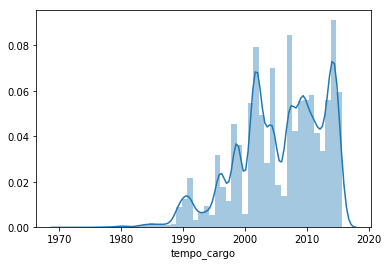

In [11]:
sns.distplot(2017-df['tempo_cargo'] / 365);

In [12]:
df[df['CD_AREA_ATUACAO_BASE'].between(1,8)]['CD_AREA_ATUACAO_BASE']

0        2
1        2
2        2
3        8
4        8
5        8
6        8
7        2
8        2
9        2
10       3
11       8
12       8
13       2
14       2
15       8
16       2
17       2
18       8
19       3
20       2
21       2
22       8
23       2
24       3
25       3
26       2
27       2
28       8
29       2
        ..
83274    1
83275    1
83276    1
83277    1
83278    1
83279    1
83280    1
83281    1
83282    1
83283    1
83284    1
83285    1
83286    1
83287    1
83288    1
83289    2
83290    1
83291    1
83292    8
83293    8
83294    8
83295    1
83296    1
83298    1
83299    1
83300    1
83301    1
83302    2
83303    1
83304    3
Name: CD_AREA_ATUACAO_BASE, Length: 66985, dtype: int64

In [13]:
df[(df['CD_AREA_ATUACAO_BASE'].between(1,8))].groupby(['NIVEL_FORM']).agg({'CD_SERV_SME': 'count'})

,CD_SERV_SME
NIVEL_FORM,
1 GRAU OU INFERIOR,317
BACHARELADO,240
DOUTORADO,125
LICENCIATURA CURTA,123
LICENCIATURA PLENA,37888
MAGISTERIO,1766
MESTRADO,1245
POS GRADUACAO LATO SENSU,25281


In [14]:
df[df['NIVEL_FORM'] == '1 GRAU OU INFERIOR']['DC_CARGO_BASE']

51           ASSIST.GESTAO POLITICAS PUBLICAS-N.II
143                   AUXILIAR TECNICO DE EDUCACAO
146                   AUXILIAR TECNICO DE EDUCACAO
326                        AUXILIAR ADM. DE ENSINO
358                                 AGENTE ESCOLAR
360                                 AGENTE ESCOLAR
361                                 AGENTE ESCOLAR
363                                 AGENTE ESCOLAR
364                      AGENTE DE APOIO - NIVEL I
365                      AGENTE DE APOIO - NIVEL I
366                                 AGENTE ESCOLAR
369                                 AGENTE ESCOLAR
370                                 AGENTE ESCOLAR
371                                 AGENTE ESCOLAR
373                                 AGENTE ESCOLAR
374                     AGENTE DE APOIO - NIVEL II
375                                 AGENTE ESCOLAR
376                                 AGENTE ESCOLAR
377                                 AGENTE ESCOLAR
378                            

In [15]:
pd.unique(df[['DC_CARGO_BASE', 'CD_CARGO_BASE']].values.ravel())

array(['PROF.ED.INF.E ENS.FUND.I', 3239, 'SUPERVISOR ESCOLAR', 3352,
       'DIRETOR DE ESCOLA', 3360, 'ASSISTENTE TECNICO EDUCACIONAL', 3042,
       'PROF.ENS.FUND.II E MED.-ED.FISICA', 3263,
       'PROF.ENS.FUND.II E MED.-PORTUGUES', 3298,
       'PROF.ENS.FUND.II E MED.-ED.ARTISTICA', 3336,
       'COORDENADOR PEDAGOGICO', 3379, 'PROF.ENS.FUND.II E MED.-CIENCIAS',
       3255, 'PROF.ENS.FUND.II E MED.-INGLES', 3344,
       'PROF.ENS.FUND.II E MED.-GEOGRAFIA', 3271,
       'PROF.ENS.FUND.II E MED.-MATEMATICA', 3301,
       'ASSIST.GESTAO POLITICAS PUBLICAS-N.II', 4900,
       'PROF.DE ED.INFANTIL', 3875, 'ASSESSOR TECNICO I', 95,
       'ASSIST.GESTAO POLITICAS PUBLICAS-N.I', 4899,
       'AUXILIAR TECNICO DE EDUCACAO', 4906,
       'PROF.ENS.FUND.II E MED.-HISTORIA', 3280, 'AUXILIAR ADM. DE ENSINO',
       4502, 'PROF.1.GRAU NIVEL II', 3310,
       'PROF.ENS.FUND.II E MED.-HIST.FILOS.EDUC.', 3877,
       'PROF.SUBST.DE 1.GR. NIVEL I', 3247,
       'ASSIST. DE ATIVIDADES ARTISTICAS'

In [16]:
codigo_cargos = df[['CD_CARGO_BASE', 'DC_CARGO_BASE']].drop_duplicates('CD_CARGO_BASE').sort_values('CD_CARGO_BASE')
codigo_cargos.to_csv('codigo_cargos.csv', header=True, index=False)
codigo_cargos

,CD_CARGO_BASE,DC_CARGO_BASE
82647,19,SECRETARIO MUNICIPAL
74019,27,CHEFE DE GABINETE
8320,43,COORDENADOR GERAL
54233,71,ASSESSOR I
64070,72,ASSESSOR II
69253,78,CHEFE DE ASSESSORIA JURIDICA
73,95,ASSESSOR TECNICO I
43840,96,ASSESSOR TECNICO II
68386,108,DIRETOR DE DIVISAO TECNICA
505,248,AUXILIAR DE GABINETE


### Selecionando professores

In [17]:
prof = df[df['DC_CARGO_BASE'].str.contains("PROF.")]
len(prof)

63438

In [18]:
prof.groupby(['NIVEL_FORM']).agg({'CD_SERV_SME': 'count'})

,CD_SERV_SME
NIVEL_FORM,
1 GRAU OU INFERIOR,1
BACHARELADO,197
DOUTORADO,80
LICENCIATURA CURTA,123
LICENCIATURA PLENA,36607
MAGISTERIO,1765
MESTRADO,1025
POS GRADUACAO LATO SENSU,23640


In [26]:
prof['ano_ingresso'] = 2016 - prof['tempo_cargo'] / 365

/Users/bpl/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


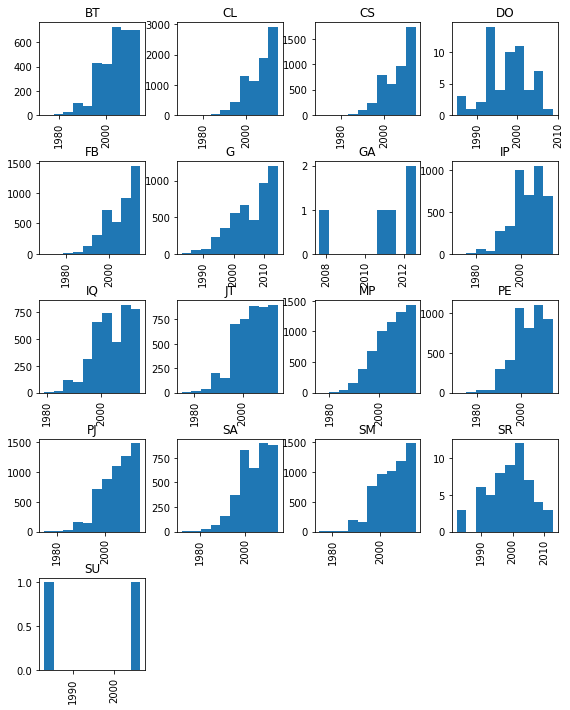

In [27]:
plt.rcParams["figure.figsize"] = [9, 12]
prof['ano_ingresso'].hist(by=prof['SIGLA_LOTACAO']);